In [2]:
import networkx as nx
import numpy as np

In [3]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\"

G_init = nx.Graph()
d = {}
for year in range(2009, 2010):
    for month in range(1,13):
#         Unix time of transaction hash of transaction hash of first output address amount of first output bitcoins 
#         hash of second output address amount of second output bitcoins (additional outputs, if exist)\r\n
        with open(path +str(year)+"\\"+ 'outputs' + str(year) + '_' + str(month) + '.txt', 'r') as f:
            data = f.readlines()
            for trnx in data:
                trnx = trnx[:-1].split("\t")
                ind=0
                for i in range(2, len(trnx), 2):
                    d[(trnx[1], str(ind))] = [trnx[i], int(trnx[i+1])]
                    G_init.add_edge(trnx[1], trnx[i], weight = trnx[i+1])
                    ind+=1

In [4]:
G = nx.MultiDiGraph()
for year in range(2009, 2010):
    for month in range(1,13):
        with open(path +str(year)+"\\"+ 'inputs' + str(year) + '_' + str(month) + '.txt', 'r') as f:
            data = f.readlines()
            for trnx in data:
                trnx = trnx[:-1].split("\t")
                incosts = []
                f=0
                for i in range(2, len(trnx), 2):
                    try:
                        incosts.append(d[(trnx[i], trnx[i+1])])
                    except:
                        f=1
                        
                neigh = list(G_init.neighbors(trnx[1]))
                outcosts = np.array([int(G_init[trnx[1]][v]['weight']) for v in neigh])
                if f==1:
                    if incosts == []:
                        incosts.append(['unknown', sum(outcosts)])
                    else: 
                        s = sum(map(int, list(np.array(incosts).transpose()[1])))
                        incosts.append(['unknown', sum(outcosts)-s])
                incosts = np.array(incosts).transpose()
                s = sum(map(int, list(incosts[1])))
                incosts[1] = np.array(list(map(int, incosts[1])))/s
                for i in range(len(incosts[1])):
                    costs = float(incosts[1][0])*outcosts
                    for j in range(len(neigh)):
                        G.add_edge(incosts[0][i], neigh[j], weight = costs[j])

In [14]:
# for i in G.nodes():
#     print(i)

In [5]:
G.number_of_nodes(), G.number_of_edges()

(53, 349)

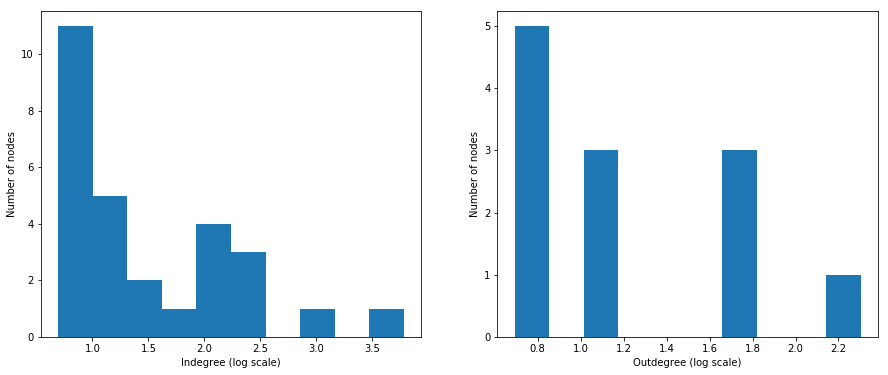

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))
plt1 = fig.add_subplot(121)
lst = []
for i in G.nodes():
    if i!="noaddress" and i!="unknown":
        d = G.in_degree(i)
        if d>1:
            lst.append(d)
plt1.set_xlabel("Indegree (log scale)")
plt1.set_ylabel("Number of nodes")
plt1.hist(np.log(lst))

plt2 = fig.add_subplot(122)
lst = []
for i in G.nodes():
    if i!="noaddress" and i!="unknown":
        d = G.out_degree(i)
        if d>1:
            lst.append(d)
            
plt2.set_xlabel("Outdegree (log scale)")
plt2.set_ylabel("Number of nodes")
plt2.hist((np.log(lst)))
plt.show()

In [8]:
from networkx.algorithms.community import greedy_modularity_communities
G.remove_node("unknown")
G.remove_node("noaddress")
c = greedy_modularity_communities(G)

IndexError: list index out of range

In [ ]:
# nx.get_node_attributes(G, 'weight')

In [ ]:
G.nodes()

In [ ]:
G.nodes()